In [92]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline

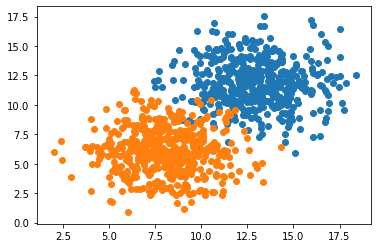

In [93]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [94]:
# Import the Sequential class to create a neural network model.
model = Sequential()
# Adding Dense types of layers. Here, we aim to create 2 layers(i/p and o/p) of Dense layer. i/p layer has 2 nodes(input_shape). 
# o/p layers has 1 node(units). Activation function to be used is sigmoid. 
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
# Adam is an optimizer which will be used in the model for optimization and minimizing error. Learning rate is specified by lr.
adam = Adam(lr = 0.1)
# Specifying some properties of our model. It will use the adam optimizer. The error(loss) would be of binary cross entropy. 
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
# Training the model. x and y means the input data and labes respectively.
h = model.fit(x = X, y = y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 'true')

Epoch 1/500
1000/1000 [==============================] - 0s 336us/step - loss: 1.4227 - acc: 0.5550
Epoch 2/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.6244 - acc: 0.6120
Epoch 3/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.4457 - acc: 0.8290
Epoch 4/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.3836 - acc: 0.8950
Epoch 5/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.3405 - acc: 0.9050
Epoch 6/500
1000/1000 [==============================] - 0s 23us/step - loss: 0.3076 - acc: 0.9270
Epoch 7/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.2883 - acc: 0.9330
Epoch 8/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.2608 - acc: 0.9390
Epoch 9/500
1000/1000 [==============================] - 0s 23us/step - loss: 0.2344 - acc: 0.9580
Epoch 10/500
1000/1000 [==============================] - 0s 23us/step - loss: 0.2188 - acc: 0.9630
Epoch 11

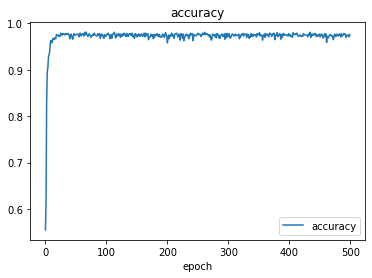

In [95]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

Text(0.5, 0, 'epoch')

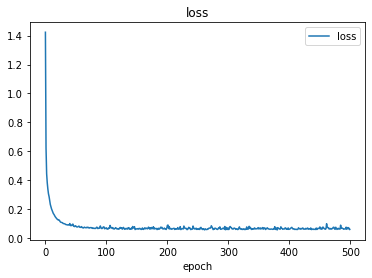

In [96]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [97]:
def plot_decision_boundary(X, y, model):
    # x_span contains 50 horizontal(along x-axis) values spaced at equal intervals ranging from the minimum-1 to maximum+1. Shape is (50,)
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    # y_span contains 50 vertical(along y-axis) values spaced at equal intervals ranging from the minimum-1 to maximum+1. Shape is (50,)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    # meshgrid creates a rectangular grid(2D array) from 1D array
    # xx contains the repeated copies of x_span in form of identical rows. Shape is (50, 50)
    # yy contains the repeated copies of y_span in form of identical columns. Shape is (50, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    # ravel is somewhat opposite of meshgrid. It is called on a 2D array and returns 1D array
    # xx_ and yy_ contains the data of their respective rows appended in a single row. Shape of both is (2500, )
    xx_, yy_ = xx.ravel(), yy.ravel()
    # grid is like our test data. grid contains combined data of xx_ and y__. Data of xx_ in the first column and data of yy_ in second column. Shape is (2500, 2).
    grid = np.c_[xx_, yy_]
    # We send the grid in the predict function of the model. This model tests all the points inside the grid and returns an array of predictions.
    # These predictions(pred_func) indicate the probability of any given point labelled as 1. Shape is (2500, 1)
    pred_func = model.predict(grid)
    # Reshaping pred_func to resemble shape of xx and yy. Shape is (50, 50)
    z = pred_func.reshape(xx.shape)
    # contourf corelates each specific coordinate with it's repective prediction probability(z).
    # Based on that the function plots distinct contour zones each of which represents a distinct probability level
    plt.contourf(xx, yy, z)

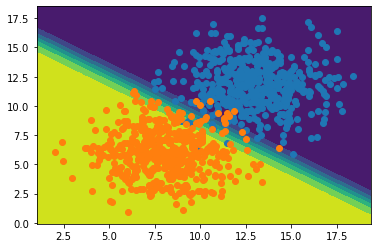

In [98]:
plot_decision_boundary(X, y, model)
# Plotting original data points on the predicted decision boundary based on the grid(test data)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.816489]]


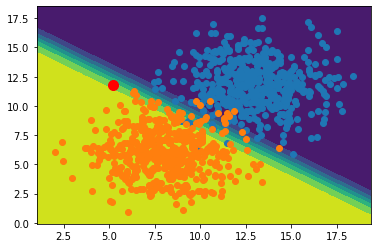

In [99]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
# Checking the probability of this point belonging to region 1
x = 5.19
y = 11.80
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = "r")
print("Prediction is:", prediction)